<a href="https://colab.research.google.com/github/Arafat4341/object_detection_from_image_deep_learning/blob/master/A_NoteBook_for_the_DeepLearningCourseKaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**All the information and contents of this notebook is taken from the "Deep Learning Course" of Kaggle.**

**Some notes about Tensorflow and Keras**


*   TensorFlow is the most popular tool for Deep Learning so far.
*   Keras is a popular API or interface for specifying Deep Learning Models.

*   Keras started as a stand-alone library for specifying Deep Learning models which can then be run in Tensorflow as well as some other Deep Learning computational Engines.
*   The stand-alone keras library still exists. But the creator of Keras implimented a version of Keras that is built into Tensorflow as TF is the most dominant engine for deep learning.


*   This allows us to specify models with the elegance of Keras while taking greater advantage of some powerful tensorflow features.










**How images are stored for Machine Learning**


*   An image is composed of pixels. The pixels of an image is arranged in rows and columns. So we can store an image in a matrix.
Each index value of the image matrix represents the darkness of that particular pixel (grayscale).
*   Color images has extra dimensions. For each pixel, we store how red that pixel is, how blue and how green that pixel is (RGB scale). Its like a stack of three matrices.


*   'Tensor' is like a matrix but it can have any number of dimension. So, we can call them (stack of matrices) tensors.
*   A grayscale image has 2D tensor/matrix of pixels.








**Convolutions**


*   Today's deep learning applies something called 'convolution' to the tensors of images.
*   Convolutions/Filters are small 2D tensors that can be multiplied over small sections of the main image.

*   Different filters has different capabilities. Some can detect horizontal edges, some can detect verticle edges.
*   We apply the filter to each part of the image and map the output in an output tensor. This give us a map showing where the particular pattern shows up in the image.

*   In practice, we won't pick up the numbers of the filters ourselves. Rather, the numbers are set during the training process using gradient descent and backpropagation.


*   Each convolution we apply on the tensor creates a new 2D tensor. We stack all those 2D tensors into a 3D tensor. 
*   Now, we want to apply another layer of convolution. But we won't apply it to the raw pixels of images like the 1st layer. Instead, we apply it to the 3D tensor that we got as an output after the 1st layer of convolution. This way we can discover more interesting patterns eventually.








**Handling image data**

Now we shall see how to import image data and manupulate it for Machine Learning tasks.

In [0]:
from os.path import join

image_dir = ''
file_names = ['a.jpg', 'b.jpg', 'c.jpg', 'd.jpg']
image_paths = [join(image_dir, file_name) for file_name in file_names]


**Function for read and prep images for modeling**

In [0]:
import numpy as np
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

image_size = 224

def read_and_prep_images(img_paths, img_height=image_size, img_width=image_size):
  imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
  img_array = np.array([img_to_array(img) for img in imgs])
  #plt.imshow(imgs[1]) # checked if the images loaded successfully or not
  output = preprocess_input(img_array)
  return output


**Loading Models**

We can train our own model or we can use pre-trained models. For using pre-trained models we can download weights from 'imagenet' or we can use saved weights from previous training and add the path of the weight file to the model.

ResNet50 is one of the greatest models for image processing. The `weights` argument of ResNet50 should be either `None` (random initialization), `imagenet` (pre-training on ImageNet), or the path to the weights file to be loaded.

In [0]:
from tensorflow.python.keras.applications import ResNet50

my_model = ResNet50(weights='imagenet')

test_data = read_and_prep_images(image_paths)

preds = my_model.predict(test_data)

**Visualizing prediction**

ResNet50 model gives 1000 probability/prediction on a single image. But we need the highest probability results. The `decode_predictions` function does the trick for us. It can interpret the predictions with the corresponding label making the predictions more predictable.

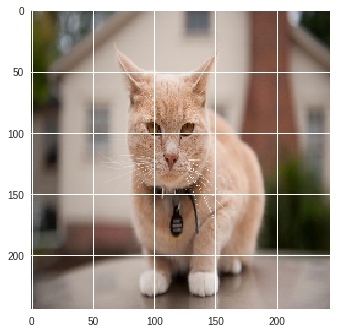

[('n02124075', 'Egyptian_cat', 0.73855686), ('n02127052', 'lynx', 0.14534119), ('n02123159', 'tiger_cat', 0.03241621), ('n02123597', 'Siamese_cat', 0.010350419), ('n02123045', 'tabby', 0.0060098986), ('n02085620', 'Chihuahua', 0.0057099448), ('n03935335', 'piggy_bank', 0.004564755), ('n04589890', 'window_screen', 0.0037178588), ('n03958227', 'plastic_bag', 0.0029504122), ('n09229709', 'bubble', 0.0024552583)]


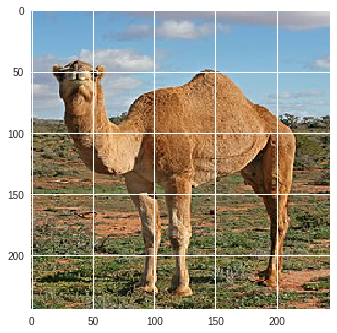

[('n02437312', 'Arabian_camel', 0.9999659), ('n02437616', 'llama', 2.8827591e-05), ('n02415577', 'bighorn', 3.7646255e-06), ('n02412080', 'ram', 1.0434455e-06), ('n02417914', 'ibex', 9.110042e-08), ('n01518878', 'ostrich', 6.289697e-08), ('n02410509', 'bison', 3.851024e-08), ('n02423022', 'gazelle', 3.696366e-08), ('n02422699', 'impala', 3.5609833e-08), ('n02389026', 'sorrel', 3.4570036e-08)]


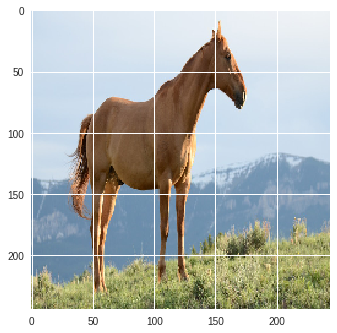

[('n02389026', 'sorrel', 0.67569464), ('n02422106', 'hartebeest', 0.17898987), ('n02437312', 'Arabian_camel', 0.044696588), ('n02100583', 'vizsla', 0.030469611), ('n02091244', 'Ibizan_hound', 0.016298478), ('n02091831', 'Saluki', 0.012488948), ('n02087394', 'Rhodesian_ridgeback', 0.010265783), ('n02422699', 'impala', 0.006771215), ('n02423022', 'gazelle', 0.003133308), ('n02091134', 'whippet', 0.0023952129)]


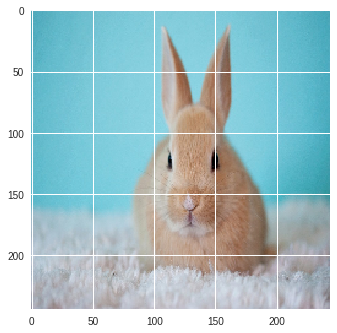

[('n02325366', 'wood_rabbit', 0.7862994), ('n02326432', 'hare', 0.20189717), ('n02328150', 'Angora', 0.010069879), ('n02342885', 'hamster', 0.0015892964), ('n02364673', 'guinea_pig', 4.5010805e-05), ('n02808304', 'bath_towel', 1.1829586e-05), ('n07714990', 'broccoli', 5.6757453e-06), ('n01914609', 'sea_anemone', 5.1434918e-06), ('n02834397', 'bib', 4.288001e-06), ('n02356798', 'fox_squirrel', 3.2495516e-06)]


In [0]:
from tensorflow.keras.applications.resnet50 import decode_predictions

most_likely_labels = decode_predictions(preds, top=10)

for i,image in enumerate(image_paths):
  plt.imshow(load_img(image, target_size=(244, 244)))
  plt.show()
  print(most_likely_labels[i])

**Transfer Learning**

Lets assume, our previous task was to predict wheather a photo is of a building or a Tin-wood house. We need to train our model with the photos of buildings and tin-wood houses. Our model learns from the data. Now, our new task is to determine whether a photo is rural or urban. So, in this task we can take the learning of the previous model (pre-trained model) and use it for the new task. 

Transfer Learning means taking what a model learns while solving one problem and applying it to a new application without re-training.


*   Early layer in a network identifies simple shape.
*   Later layers identofy more complex visual patterns.
*   Last Layer makes the prediction.

So, we can use pre-trained models and just replace the final layer that was used to make predictions. We replace the last layer with our new last layer with new categories (urban, rural).

We use data to train the last layer of the model. The training data will be labeled accordingly.

We allow all features from one layer to influence or be connected with a prediction layer as the final result is dependent upon every nodes from the previous layer. So, we call it a dense layer.

We get a score for each category in the final layer. We add an activation function named 'Softmax' which converts scores into probabilities.

Now, we shall implement these concepts in code

In [0]:
# specifying model

from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

num_classes = 2
my_new_model = Sequential() # we added a sequential model that we can add layers to
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet')) # we added the pretrained ResNet50 model to our sequential structur. We removed the prediction layer by argument 'include_top=False'
my_new_model.add(Dense(num_classes, activation='softmax'))
my_new_model.layers[0].trainable = False # our first layer is the resnet pretrained model and we don't want to re-train it

Instructions for updating:
Colocations handled automatically by placer.
94658560/94653016 [==============================] - 16s 0us/step


In [0]:
# compile model

my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
# unzipping the uploaded files
from zipfile import ZipFile
filename = 'rural_and_urban_photos.zip'

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('done')

done


In [0]:
# fit model
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
                    'train',
                    target_size=(image_size, image_size),
                    batch_size=24,
                    class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
                    'val',
                    target_size=(image_size, image_size),
                    class_mode='categorical')

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        validation_data=validation_generator,
        validation_steps=1)

**Data Augmentation**

To increase training data quantity and diversity, we can flip/rotate an image horizontally and train the model with both the original image and the flipped image. This technique is called Data Augmentation. Though this is useful when we have less data to train, it can also be useful with large dataset. But we have to be careful with some cases, such as: we dont want to flip a text image.

In [0]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

image_size = 224

data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True, #flip each image horizontally
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)

train_generator = data_generator_with_aug.flow_from_directory(
        'train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)

validation_generator = data_generator_no_aug.flow_from_directory(
        'val',
        target_size=(image_size, image_size),
        class_mode='categorical')

my_new_model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=1)

Found 72 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/2
3/3 [==============================] - 28s 9s/step - loss: 0.8756 - acc: 0.4306 - val_loss: 0.3854 - val_acc: 0.8500
Epoch 2/2
3/3 [==============================] - 25s 8s/step - loss: 0.3830 - acc: 0.8750 - val_loss: 0.2508 - val_acc: 0.9000
